<a href="https://colab.research.google.com/github/minasoto54/McCullock-Pitts/blob/main/Clasificacion_de_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### La función plot_image toma como entrada el índice de una imagen (i), el arreglo de predicciones para todas las imágenes (predictions_array), las etiquetas verdaderas (true_label), y las imágenes en sí (img). Su propósito es mostrar una sola imagen del conjunto de prueba junto con su etiqueta verdadera y la etiqueta predicha por el modelo, indicando si la predicción fue correcta o incorrecta.

Aquí está el desglose de la función plot_image:

true_label, img = true_label[i], img[i]: Obtiene la etiqueta verdadera y la imagen correspondiente al índice i.
plt.grid(False), plt.xticks([]), plt.yticks([]): Desactiva la cuadrícula y las marcas de los ejes x e y para que solo se muestre la imagen.
plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary): Muestra la imagen en escala de grises. La imagen se remodela a 28x28 píxeles.
predicted_label = tf.argmax(predictions_array).numpy(): Obtiene el índice de la clase con la mayor probabilidad de las predicciones para esta imagen. Este índice es la etiqueta predicha.
if predicted_label == true_label:: Compara la etiqueta predicha con la etiqueta verdadera.
color = 'blue' o color = 'red': Establece el color del texto de la etiqueta en azul si la predicción es correcta y en rojo si es incorrecta.
plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*tf.reduce_max(predictions_array).numpy(), class_names[true_label]), color=color): Crea la etiqueta de texto que se mostrará debajo de la imagen. Incluye el nombre de la clase predicha, el porcentaje de confianza de la predicción y el nombre de la clase verdadera entre paréntesis. El color del texto se basa en si la predicción fue correcta.
El código que sigue a la función plot_image se encarga de mostrar una cuadrícula de imágenes con sus predicciones:

class_names = [...]: Redefine los nombres de las clases (aunque ya estaban definidos anteriormente).
num_rows = 5, num_cols = 3: Establece el número de filas y columnas para la cuadrícula de imágenes.
num_images = num_rows * num_cols: Calcula el número total de imágenes que se mostrarán.
plt.figure(figsize=(...)): Crea una figura para contener todos los subgráficos de las imágenes. El tamaño de la figura se ajusta para acomodar la cuadrícula.
for i in range(num_images):: Itera a través de las primeras num_images imágenes del conjunto de prueba.
plt.subplot(num_rows, 2*num_cols, 2*i+1): Crea un subgráfico dentro de la figura para la imagen actual. Se utiliza 2*i+1 para colocar la imagen en la posición correcta en la cuadrícula.
plot_image(i, predictions[i], test_labels, test_images): Llama a la función plot_image para graficar la imagen actual con su predicción.
plt.tight_layout(): Ajusta automáticamente los parámetros de la subtrama para que las subtramas encajen en el área de la figura.
plt.show(): Muestra el gráfico con todas las imágenes y sus predicciones.
En resumen, este código toma las predicciones del modelo y las visualiza junto con las imágenes originales y sus etiquetas verdaderas para que puedas ver fácilmente el rendimiento del modelo en ejemplos individuales.

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Importar las librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Cargar el conjunto de datos Fashion MNIST desde los conjuntos de datos de TensorFlow Keras
fashion_mnist = tf.keras.datasets.fashion_mnist

In [24]:
# Cargar los datos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
# Definir los nombres de las clases para el conjunto de datos Fashion MNIST
class_names = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Bota de tobillo']

In [28]:
# Seleccionar una imagen y su etiqueta del conjunto de entrenamiento
index = 200
image = train_images[index]
label = train_labels[index]

In [29]:
# Imprimir los valores de píxel de la imagen seleccionada
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0  82 122  37   0   5
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  38 100  28 121   0   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0  86  43   0 136  15   0
    2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 104  30   0 102  40   0
    3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0 111   2   0  73  81   0
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0  17  87   0   0  45  81   0
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  54  90   0   0  24  92   0
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0  76  30   0   0   0  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0  74   0   0   0   

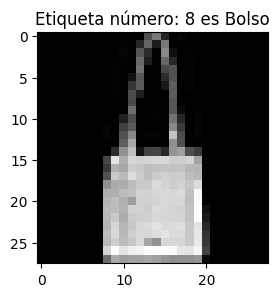

In [30]:
# Mostrar la imagen seleccionada y su etiqueta
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

In [31]:
# Imprimir la forma de los conjuntos de datos de imágenes de entrenamiento y prueba
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [32]:
# Normalizar las imágenes para que los valores de píxel estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [33]:
# Crear el modelo CNN utilizando la API Sequential
model = Sequential([
    # Primera capa convolucional con 32 filtros, un kernel de 3x3 y activación ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Primera capa de max pooling con un tamaño de pool de 2x2
    MaxPooling2D((2, 2)),
    # Segunda capa convolucional con 64 filtros, un kernel de 3x3 y activación ReLU
    Conv2D(64, (3, 3), activation='relu'),
    # Segunda capa de max pooling con un tamaño de pool de 2x2
    MaxPooling2D((2, 2)),
    # Tercera capa convolucional con 64 filtros, un kernel de 3x3 y activación ReLU
    Conv2D(64, (3, 3), activation='relu'),
    # Aplanar la salida de las capas convolucionales
    Flatten(),
    # Primera capa densa con 64 unidades y activación ReLU
    Dense(64, activation='relu'),
    # Capa de salida densa con 10 unidades (una para cada clase)
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Definir la tasa de aprendizaje deseada para el optimizador
learning_rate = 0.001
# Crear un optimizador Adam con la tasa de aprendizaje especificada
adam_optimizer = Adam(learning_rate=learning_rate)

In [35]:
# Compilar el modelo
model.compile(optimizer=adam_optimizer,
              # Usar la pérdida SparseCategoricalCrossentropy para etiquetas enteras
              loss=SparseCategoricalCrossentropy(from_logits=True),
              # Rastrear la precisión durante el entrenamiento y la evaluación
              metrics=['accuracy'])

In [36]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.1000 - loss: 2.3033


In [37]:
# Crear un modelo de probabilidad agregando una capa Softmax al modelo entrenado
probability_model = Sequential([model, Softmax()])
# Hacer predicciones sobre las imágenes de prueba
predictions = probability_model.predict(test_images)
# Obtener las etiquetas predichas encontrando el índice con la probabilidad más alta
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
# Crear un objeto de visualización para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

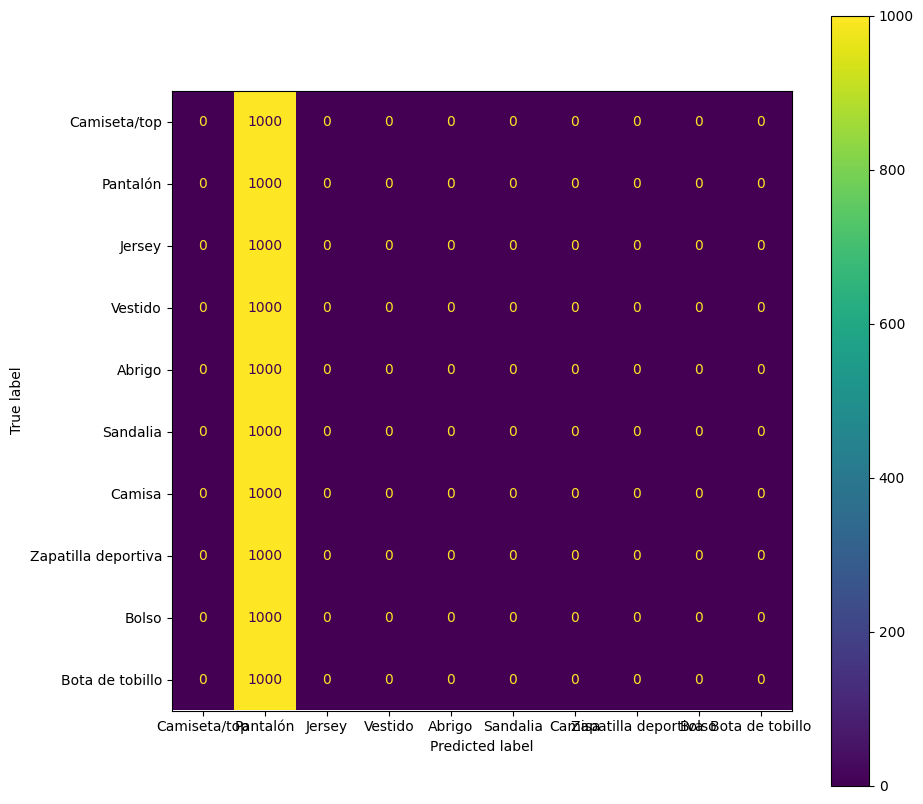

In [39]:
# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

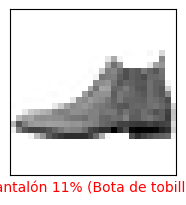

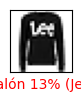

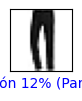

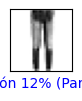

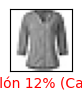

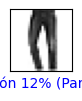

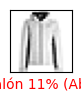

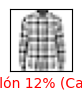

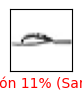

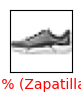

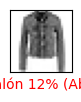

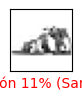

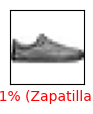

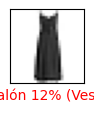

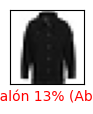

In [40]:
# Función para graficar una imagen y su predicción
def plot_image(i, predictions_array, true_label, img):
      # Obtener la etiqueta verdadera y la imagen para el índice dado
      true_label, img = true_label[i], img[i]
      # Desactivar las líneas de la cuadrícula
      plt.grid(False)
      # Desactivar las marcas de los ejes x e y
      plt.xticks([])
      plt.yticks([])

      # Mostrar la imagen en escala de grises
      plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

      # Obtener la etiqueta predicha
      predicted_label = tf.argmax(predictions_array).numpy()
      # Establecer el color del texto según si la predicción es correcta
      if predicted_label == true_label:
       color = 'blue'
      else:
       color = 'red'

      # Mostrar la etiqueta predicha, la confianza y la etiqueta verdadera
      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                                100*tf.reduce_max(predictions_array).numpy(),
                                                class_names[true_label]),
                                                color=color)


# Definir los nombres de las clases nuevamente (ya definidos arriba, pero incluidos aquí para completar)
class_names = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Bota de tobillo']

# Establecer el número de filas y columnas para mostrar imágenes
num_rows = 5
num_cols = 3
# Calcular el número total de imágenes a mostrar
num_images = num_rows * num_cols
# Crear una figura para contener las imágenes
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# Iterar a través de las imágenes y graficar cada una
for i in range(num_images):
  # Crear un subgráfico para la imagen actual
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Graficar la imagen con su predicción
  plot_image(i, predictions[i], test_labels, test_images)

  # Ajustar el diseño para evitar que los títulos/etiquetas se superpongan
  plt.tight_layout()
  # Mostrar el gráfico
  plt.show()

In [41]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [42]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
index = 200

In [46]:
image = train_images[index]
label = train_labels[index]

In [47]:
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0  82 122  37   0   5
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  38 100  28 121   0   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0  86  43   0 136  15   0
    2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 104  30   0 102  40   0
    3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0 111   2   0  73  81   0
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0  17  87   0   0  45  81   0
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  54  90   0   0  24  92   0
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0  76  30   0   0   0  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0  74   0   0   0   

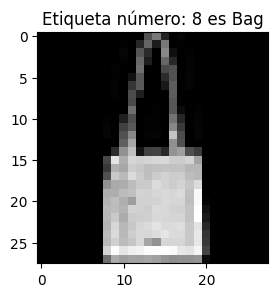

In [48]:
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

In [49]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [50]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [51]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [53]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.1504 - loss: 2.3042


In [55]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [56]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

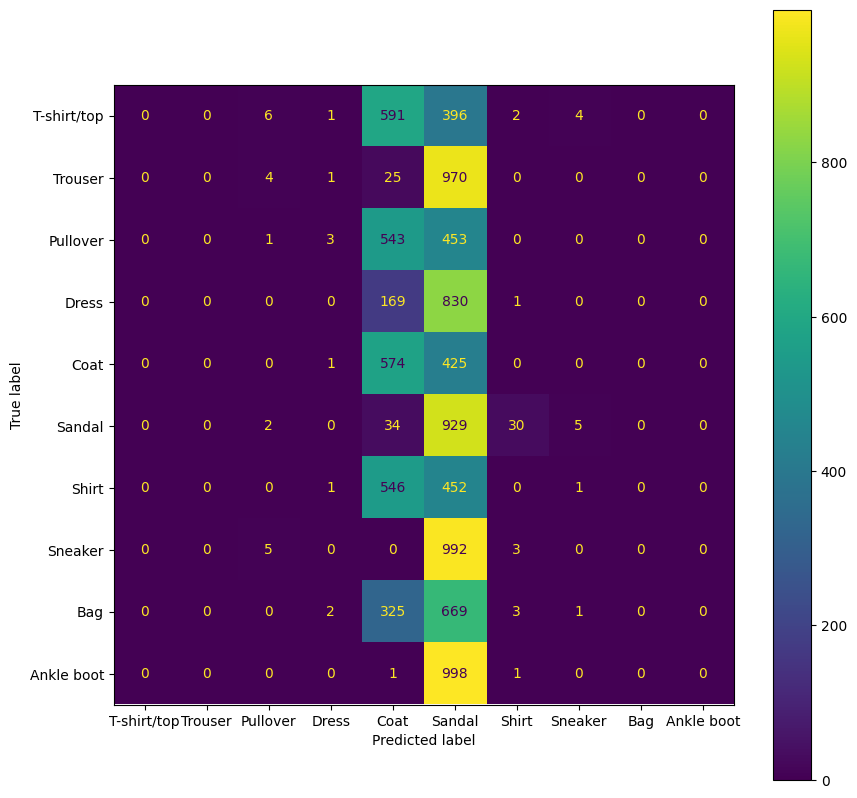

In [60]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

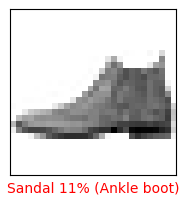

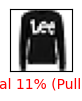

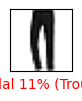

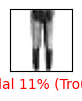

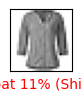

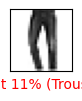

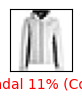

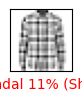

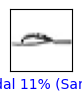

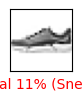

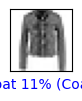

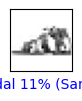

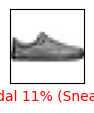

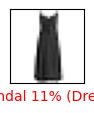

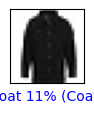

In [62]:
def plot_image(i, predictions_array, true_label, img):
      true_label, img = true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

      predicted_label = tf.argmax(predictions_array).numpy()
      if predicted_label == true_label:
       color = 'blue'
      else:
       color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                                100*tf.reduce_max(predictions_array).numpy(),
                                                class_names[true_label]),
                                                color=color)


# Graficar algunas prediccione
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)



  plt.tight_layout()
  plt.show()

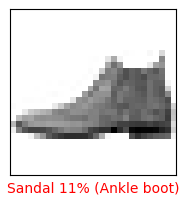

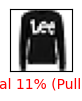

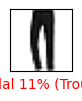

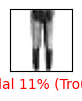

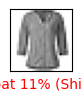

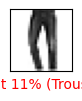

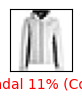

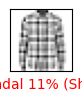

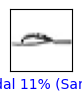

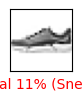

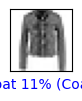

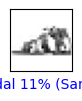

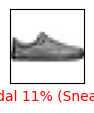

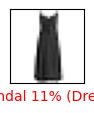

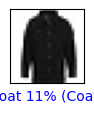

In [64]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                                 100*tf.reduce_max(predictions_array).numpy(),
                                                 class_names[true_label]),
                                                 color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

    plt.tight_layout()
    plt.show()